In [12]:
import pandas as pd
import numpy as np

In [13]:
pd.options.mode.chained_assignment = None

In [14]:
train = pd.read_csv('prediction_log/train_log.csv')
train_y = pd.read_csv('prediction_log/train_truth.csv')
test = pd.read_csv('prediction_log/test_log.csv')
test_y = pd.read_csv('prediction_log/test_truth.csv')

In [15]:
course_info = pd.read_csv('course_info.csv')
user_info = pd.read_csv('user_info.csv')

In [16]:
train.head()

,enroll_id,username,course_id,session_id,action,object,time
0,772,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click_about,NaN,2015-09-27T15:42:59
1,772,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click_info,NaN,2015-09-27T15:43:12
2,773,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,pause_video,3dac5590435e43b3a65a9ae7426c16db,2015-10-19T19:37:42
3,773,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,load_video,3dac5590435e43b3a65a9ae7426c16db,2015-10-19T19:33:27
4,773,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,play_video,3dac5590435e43b3a65a9ae7426c16db,2015-10-19T19:33:30


In [17]:
train_y.head()

,enroll_id,truth
0,772,1
1,773,1
2,774,1
3,776,0
4,777,1


In [18]:
course_info.head()

,id,course_id,start,end,course_type,category
0,6561,course-v1:CPVS+CPVS-HDLSC001+20160901,2016-11-16 08:00:00,2016-12-31 23:30:00,0,NaN
1,5557,course-v1:SCUT+144282+201709,2016-09-01 00:00:00,2017-02-28 00:00:00,0,NaN
2,9433,course-v1:ZK+06093+J,2018-01-01 08:00:00,2020-01-01 00:00:00,0,NaN
3,8320,course-v1:nuist+001+2016-T1,2017-03-01 18:30:00,2017-07-01 23:30:00,0,NaN
4,231,FUDAN/CFD004/2014.9-2015.1,2014-09-10 08:00:00,2015-09-10 00:00:00,0,NaN


In [19]:
user_info.head()

,user_id,gender,education,birth
0,631,male,High,1997.0
1,2631,male,Bachelor's,1990.0
2,4231,male,Associate,1991.0
3,6031,male,Bachelor's,1988.0
4,7831,NaN,NaN,NaN


## EDA

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 10})

In [22]:
eda_info = train_y.merge(train.merge(user_info, left_on='username', right_on='user_id', how='left'), on='enroll_id')

In [23]:
eda_info.head()

,enroll_id,truth,username,course_id,session_id,action,object,time,user_id,gender,education,birth
0,772,1,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click_about,NaN,2015-09-27T15:42:59,5981,male,Master's,1989.0
1,772,1,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click_info,NaN,2015-09-27T15:43:12,5981,male,Master's,1989.0
2,773,1,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,pause_video,3dac5590435e43b3a65a9ae7426c16db,2015-10-19T19:37:42,1544995,NaN,NaN,NaN
3,773,1,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,load_video,3dac5590435e43b3a65a9ae7426c16db,2015-10-19T19:33:27,1544995,NaN,NaN,NaN
4,773,1,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,play_video,3dac5590435e43b3a65a9ae7426c16db,2015-10-19T19:33:30,1544995,NaN,NaN,NaN


#### Summary Statistics

In [24]:
user_info_nona = user_info.dropna()
course_info_nona = course_info.dropna(subset=['category'])

In [155]:
print('Total Users (Labeled): ' + str(len(eda_info['user_id'].unique())))
print('Total Enrollments: ' + str(len(train['enroll_id'].unique())))
print('Total Courses (Labeled): ' + str(len(course_info_nona)))

Total Users (Labeled): 69823
Total Enrollments: 157943
Total Courses (Labeled): 1454


In [156]:
train_y['truth'].value_counts()

1    119817
0     38126
Name: truth, dtype: int64

#### Demographics

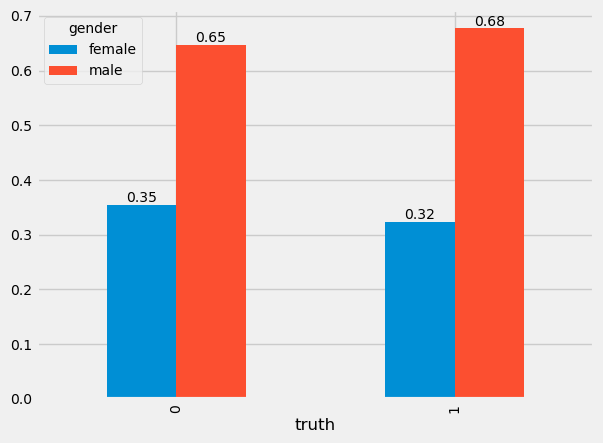

In [26]:
ax = pd.crosstab(eda_info['truth'], eda_info['gender'], normalize='index').plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

In [27]:
eda_info['age'] = int(max(eda_info['time'])[:4]) - eda_info['birth']
eda_info.groupby('truth')['age'].mean()

truth
0    27.943659
1    27.504832
Name: age, dtype: float64

#### Education

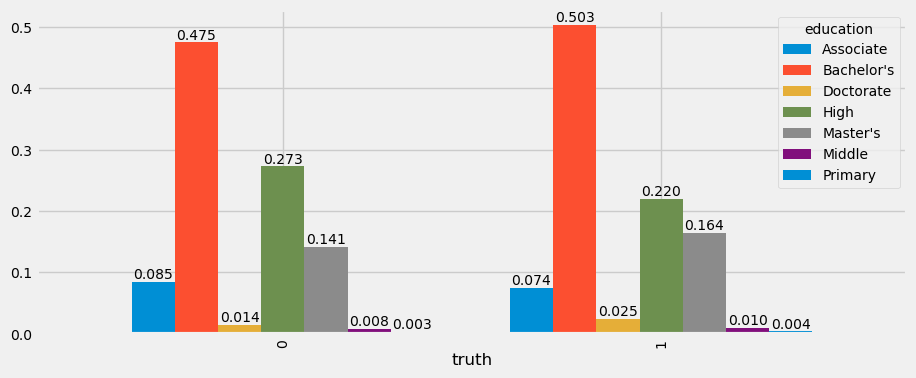

In [28]:
ax = pd.crosstab(eda_info['truth'], eda_info['education'], normalize='index').plot(kind='bar', figsize=(10, 4), width=0.8)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

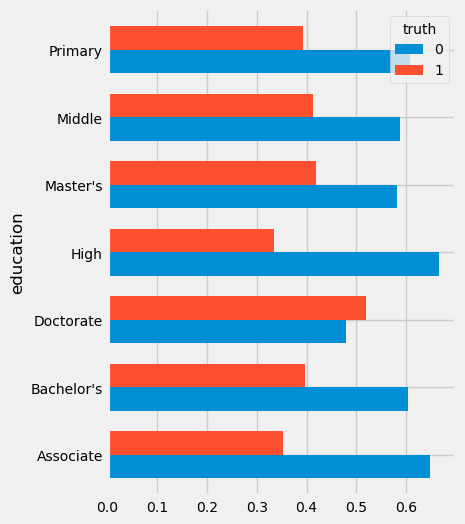

In [29]:
ax = pd.crosstab(eda_info['education'], eda_info['truth'], normalize='index').plot(kind='barh', figsize=(4, 6), xlabel='', width=0.7)
ax.tick_params(axis='x', rotation=0)

#### Actions

In [30]:
eda_info.groupby('truth')['action'].value_counts(normalize=True).groupby('truth').head(10)

truth  action          
0      stop_video          0.202946
       click_courseware    0.143389
       pause_video         0.142558
       play_video          0.115834
       problem_get         0.079033
       close_courseware    0.070587
       load_video          0.070382
       seek_video          0.057572
       problem_check       0.028489
       click_info          0.022398
1      stop_video          0.170892
       pause_video         0.146718
       click_courseware    0.125185
       play_video          0.119170
       problem_get         0.083363
       load_video          0.076713
       seek_video          0.068139
       close_courseware    0.067048
       problem_check       0.030900
       click_info          0.029394
Name: action, dtype: float64

In [31]:
action_dict = {
    'video': ['seek_video','play_video','pause_video','stop_video','load_video'],
    'problem': ['problem_get','problem_check','problem_save','reset_problem','problem_check_correct','problem_check_incorrect'],
    'forum': ['create_thread','create_comment','delete_thread','delete_comment','click_forum','close_forum'],
    'info': ['click_info','click_about','click_progress'],
    'courseware': ['click_courseware','close_courseware']
}
action_dict_inv = {v: k for k, values in action_dict.items() for v in values}

In [32]:
eda_info['action_group'] = eda_info['action'].replace(action_dict_inv)

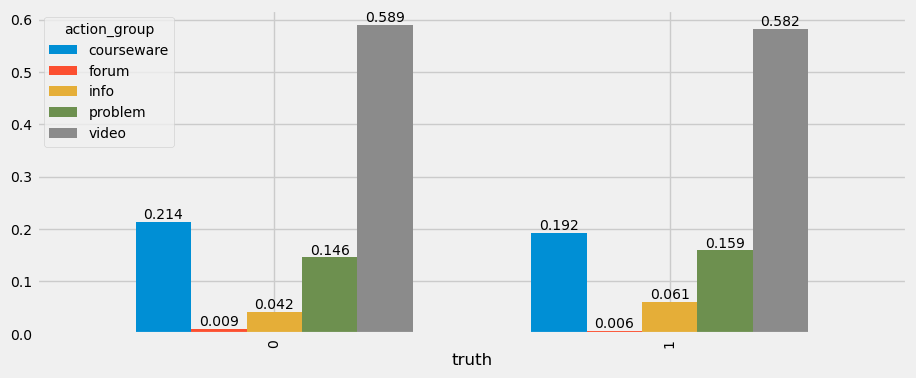

In [33]:
ax = pd.crosstab(eda_info['truth'], eda_info['action_group'], normalize='index').plot(kind='bar', figsize=(10,4), width=0.7)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

In [233]:
actions_truth = eda_info.groupby(['truth', 'enroll_id'])['action'].count().reset_index()

In [234]:
actions_truth.groupby('truth')['action'].mean()

truth
0    472.342024
1     93.117237
Name: action, dtype: float64

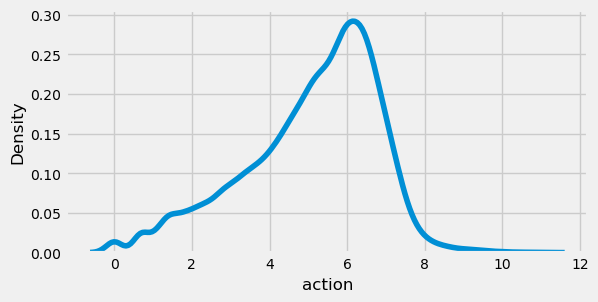

In [246]:
plt.figure(figsize=(6, 3))
ax = sns.kdeplot(np.log(actions_truth[actions_truth['truth'] == 0]['action']))

<AxesSubplot: xlabel='action', ylabel='Density'>

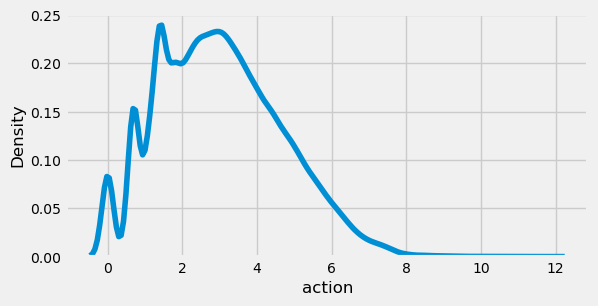

In [247]:
plt.figure(figsize=(6, 3))
sns.kdeplot(np.log(actions_truth[actions_truth['truth'] == 1]['action']))

#### Courses

In [34]:
course_info.dropna()

,id,course_id,start,end,course_type,category
17,577,TsinghuaX/70150023X/2015_T1,2015-03-02 08:00:00,2015-07-05 00:00:00,0,engineering
38,5735,course-v1:NJU+010101+2016_T1,2016-03-28 08:00:00,2017-02-15 23:30:00,0,social science
41,11612,course-v1:DYU+dyuglbbx+2017_T2,2017-09-05 08:00:00,2017-12-25 23:30:00,0,economics
45,9290,course-v1:TsinghuaX+00690302_2+2017_T2,2017-04-03 08:00:00,2017-05-31 23:30:00,0,literature
59,2070,course-v1:TsinghuaX+00510663X+2015_T2,2015-10-12 12:00:00,2016-01-16 00:00:00,0,business
...,...,...,...,...,...,...
6388,11774,course-v1:NCTU+wym+2017_T2,2017-09-05 08:00:00,2017-12-25 23:30:00,0,philosophy
6390,6771,course-v1:TsinghuaX+30700313X+2016_T2,2016-09-07 08:00:00,2016-12-23 00:00:00,0,social science
6396,1562,course-v1:TsinghuaX+30140393x_2015_2+2015_T2,2015-09-21 01:00:00,2016-02-01 08:00:00,0,physics
6398,715,TsinghuaX/THUSEM007/_,2015-06-19 08:00:00,2015-07-24 16:00:00,0,economics


## Feature Engineering

#### Action Frequency

In [35]:
train_actions = train.groupby('enroll_id')['action'].value_counts().unstack().fillna(0).reset_index()

In [36]:
train_actions.head()

action,enroll_id,click_about,click_courseware,click_forum,click_info,click_progress,close_courseware,close_forum,create_comment,create_thread,...,pause_video,play_video,problem_check,problem_check_correct,problem_check_incorrect,problem_get,problem_save,reset_problem,seek_video,stop_video
0,772,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,773,2.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
2,774,0.0,17.0,0.0,6.0,0.0,9.0,0.0,0.0,0.0,...,10.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0
3,776,2.0,4.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,...,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,777,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Action Occurences (First & Last)

In [37]:
train_sorted = train.sort_values(['enroll_id', 'time'])

In [38]:
train_actions_fl = pd.get_dummies(train_sorted.groupby('enroll_id')['action'].agg(first_action='first', last_action='last').reset_index(), drop_first=True)

In [39]:
train_actions_fl.head()

,enroll_id,first_action_click_courseware,first_action_click_forum,first_action_click_info,first_action_click_progress,first_action_close_courseware,first_action_create_comment,first_action_create_thread,first_action_delete_comment,first_action_load_video,...,last_action_pause_video,last_action_play_video,last_action_problem_check,last_action_problem_check_correct,last_action_problem_check_incorrect,last_action_problem_get,last_action_problem_save,last_action_reset_problem,last_action_seek_video,last_action_stop_video
0,772,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,773,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,774,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,776,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,777,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Session Length

In [40]:
train['time'] = pd.to_datetime(train['time'])

In [41]:
train_sessions = train.groupby(['enroll_id', 'session_id'])['time'].agg(np.ptp).reset_index()

In [42]:
train_sessions_avg = train_sessions.groupby('enroll_id')['time'].agg(avg_time='mean', sessions='count').reset_index()

In [43]:
train_sessions_avg['avg_secs'] = train_sessions_avg['avg_time'].dt.total_seconds()

In [44]:
train_sessions_avg.head()

,enroll_id,avg_time,sessions,avg_secs
0,772,0 days 00:00:13,1,13.000000
1,773,0 days 00:05:56,1,356.000000
2,774,0 days 00:26:29.333333333,3,1589.333333
3,776,0 days 04:16:54,1,15414.000000
4,777,0 days 00:22:41,1,1361.000000


#### User Attributes

In [45]:
user_info_nona['age'] = 2017 - user_info_nona['birth']

In [46]:
enroll_dict = train[['enroll_id', 'username']].drop_duplicates(subset=['enroll_id'])

In [47]:
train_users = enroll_dict.merge(user_info_nona, left_on="username", right_on="user_id")

In [48]:
train_users.head()

,enroll_id,username,user_id,gender,education,birth,age
0,772,5981,5981,male,Master's,1989.0,28.0
1,73833,5981,5981,male,Master's,1989.0,28.0
2,198737,5981,5981,male,Master's,1989.0,28.0
3,209393,5981,5981,male,Master's,1989.0,28.0
4,418643,5981,5981,male,Master's,1989.0,28.0


#### Course Attributes

In [49]:
course_dict = train[['enroll_id', 'course_id']].drop_duplicates(subset=['enroll_id'])

In [50]:
train_courses = course_dict.merge(course_info_nona[['course_id', 'course_type', 'category']], on="course_id")

In [51]:
# no self-paced course in log
train_courses[train_courses['course_type'] == 1]

,enroll_id,course_id,course_type,category


In [52]:
train_courses.head()

,enroll_id,course_id,course_type,category
0,772,course-v1:TsinghuaX+70800232X+2015_T2,0,art
1,773,course-v1:TsinghuaX+70800232X+2015_T2,0,art
2,774,course-v1:TsinghuaX+70800232X+2015_T2,0,art
3,776,course-v1:TsinghuaX+70800232X+2015_T2,0,art
4,777,course-v1:TsinghuaX+70800232X+2015_T2,0,art


#### Combining Features

In [53]:
train_behavior = train_actions.merge(train_actions_fl.merge(train_sessions_avg[['enroll_id', 'sessions', 'avg_secs']], on='enroll_id'), on='enroll_id')

In [54]:
train_behavior.head()

,enroll_id,click_about,click_courseware,click_forum,click_info,click_progress,close_courseware,close_forum,create_comment,create_thread,...,last_action_problem_check,last_action_problem_check_correct,last_action_problem_check_incorrect,last_action_problem_get,last_action_problem_save,last_action_reset_problem,last_action_seek_video,last_action_stop_video,sessions,avg_secs
0,772,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,13.000000
1,773,2.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,356.000000
2,774,0.0,17.0,0.0,6.0,0.0,9.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,3,1589.333333
3,776,2.0,4.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,15414.000000
4,777,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1361.000000


In [55]:
train_behavior.shape

(157943, 63)

In [56]:
train_full_nona = train_behavior.merge(pd.get_dummies(train_users[['enroll_id', 'gender', 'education', 'age']], drop_first=True), on='enroll_id')

In [57]:
train_full_nona = train_full_nona.merge(pd.get_dummies(train_courses[['enroll_id', 'category']], drop_first=True), on='enroll_id')

In [58]:
train_full_nona.head()

,enroll_id,click_about,click_courseware,click_forum,click_info,click_progress,close_courseware,close_forum,create_comment,create_thread,...,category_electrical,category_engineering,category_foreign language,category_history,category_literature,category_math,category_medicine,category_philosophy,category_physics,category_social science
0,772,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,776,2.0,4.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,782,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,790,1.0,3.0,0.0,4.0,4.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,793,2.0,12.0,0.0,4.0,0.0,9.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
train_y_nona = train_y[train_y['enroll_id'].isin(train_full_nona['enroll_id'])].reset_index(drop=True)

## Explanatory Modeling

In [165]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [223]:
mod1 = sm.GLM(endog=train_y_nona['truth'], exog=train_full_nona.drop(columns=['enroll_id']), family=sm.families.Binomial()).fit()
print(mod1.summary())
print("AIC: " + str(mod1.aic))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  truth   No. Observations:                42631
Model:                            GLM   Df Residuals:                    42548
Model Family:                Binomial   Df Model:                           82
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18608.
Date:                Sun, 11 Dec 2022   Deviance:                       37216.
Time:                        23:17:20   Pearson chi2:                 9.55e+05
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2419
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [266]:
mod1.summary2().tables[1][mod1.summary2().tables[1]['P>|z|'] < 0.05].sort_values('Coef.', ascending=False)

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
category_foreign language,1.188387,6.459328e-02,18.398005,1.362914e-75,1.061787,1.314988
category_computer,0.964839,5.466623e-02,17.649637,1.024122e-69,0.857695,1.071983
category_math,0.899982,7.572570e-02,11.884763,1.420381e-32,0.751562,1.048402
category_medicine,0.897403,9.318372e-02,9.630469,5.945728e-22,0.714766,1.080040
category_chemistry,0.814269,1.804221e-01,4.513133,6.387706e-06,0.460648,1.167889
category_physics,0.787213,1.653363e-01,4.761281,1.923678e-06,0.463160,1.111266
category_electrical,0.753181,1.130486e-01,6.662452,2.692959e-11,0.531610,0.974752
category_engineering,0.685736,8.312003e-02,8.249948,1.584636e-16,0.522824,0.848648
last_action_seek_video,0.683056,2.546108e-01,2.682744,7.302078e-03,0.184028,1.182084
education_Primary,0.670899,2.742603e-01,2.446213,1.443657e-02,0.133359,1.208440


## Sequence Pattern Mining

In [51]:
from prefixspan import PrefixSpan

In [72]:
dropout_actions = eda_info[eda_info['truth'] == 1][['enroll_id', 'action', 'time']].sort_values(['enroll_id', 'time']).reset_index(drop=True)

In [81]:
nondropout_actions = eda_info[eda_info['truth'] == 0][['enroll_id', 'action', 'time']].sort_values(['enroll_id', 'time']).reset_index(drop=True)

In [80]:
dropout_actions_db = dropout_actions.groupby('enroll_id')['action'].apply(list).tolist()

In [82]:
nondropout_actions_db = nondropout_actions.groupby('enroll_id')['action'].apply(list).tolist()

In [84]:
print("Dropouts: " + str(len(dropout_actions_db)))
print("Non-Dropouts: " + str(len(nondropout_actions_db)))

Dropouts: 119817
Non-Dropouts: 38126


#### Weighted Random Sampling

In [95]:
eda_info.groupby('enroll_id')['action'].count().describe()

count    157943.000000
mean        184.658643
std         802.103021
min           1.000000
25%           8.000000
50%          29.000000
75%         138.000000
max      128992.000000
Name: action, dtype: float64

In [147]:
def wrs(pop, k):
    weights = np.random.dirichlet(np.ones_like(pop, dtype='int'))
    v = [np.random.random() ** (1 / w) for w in weights]
    order = sorted(range(len(pop)), key=lambda i: v[i])
    return [pop[i] for i in order[-k:]]

In [149]:
dropout_actions_wrs = list(map(lambda x: wrs(x, k=138), dropout_actions_db))

In [155]:
nondropout_actions_wrs = list(map(lambda x: wrs(x, k=138), nondropout_actions_db))

#### Frequent Sequence Sets

In [156]:
dropout_ps = PrefixSpan(dropout_actions_wrs)
nondropout_ps = PrefixSpan(nondropout_actions_wrs)

In [181]:
# 50% of total dropouts
dropout_freq = dropout_ps.frequent(59909, closed=True)

In [195]:
sorted(filter(lambda x: len(x[1]) > 1, dropout_freq), reverse=True)

[(70745, ['load_video', 'load_video']),
 (70662, ['pause_video', 'load_video']),
 (70432, ['load_video', 'pause_video']),
 (65567, ['load_video', 'close_courseware']),
 (65510, ['close_courseware', 'load_video']),
 (64182, ['pause_video', 'pause_video']),
 (60842, ['click_courseware', 'click_courseware']),
 (60814, ['click_about', 'click_about'])]

In [185]:
# 75% of total non-dropouts
nondropout_freq = nondropout_ps.frequent(28595, closed=True)

In [198]:
sorted(filter(lambda x: len(x[1]) > 1, nondropout_freq), key=lambda x: (len(x[1]), x[0]), reverse=True)

[(29244, ['load_video', 'load_video', 'load_video']),
 (29113, ['pause_video', 'load_video', 'load_video']),
 (29107, ['load_video', 'load_video', 'pause_video']),
 (29099, ['load_video', 'pause_video', 'load_video']),
 (29080, ['load_video', 'pause_video', 'pause_video']),
 (29048, ['pause_video', 'load_video', 'pause_video']),
 (29029, ['pause_video', 'pause_video', 'load_video']),
 (28738, ['pause_video', 'pause_video', 'pause_video']),
 (31757, ['load_video', 'load_video']),
 (31150, ['load_video', 'pause_video']),
 (31094, ['pause_video', 'load_video']),
 (30840, ['close_courseware', 'load_video']),
 (30779, ['load_video', 'close_courseware']),
 (30450, ['pause_video', 'pause_video']),
 (29873, ['close_courseware', 'close_courseware']),
 (29650, ['close_courseware', 'pause_video']),
 (29643, ['pause_video', 'close_courseware']),
 (28821, ['click_courseware', 'click_courseware'])]

## Predictive Modeling

In [60]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [61]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [62]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
mlp = MLPClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [63]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

In [74]:
lr_score = cross_validate(lr, train_behavior.drop(columns=['enroll_id']), train_y['truth'], cv=skf, scoring=["accuracy", "f1"], return_train_score=True)
dt_score = cross_validate(dt, train_behavior.drop(columns=['enroll_id']), train_y['truth'], cv=skf, scoring=["accuracy", "f1"], return_train_score=True)
rf_score = cross_validate(rf, train_behavior.drop(columns=['enroll_id']), train_y['truth'], cv=skf, scoring=["accuracy", "f1"], return_train_score=True)
mlp_score = cross_validate(mlp, train_behavior.drop(columns=['enroll_id']), train_y['truth'], cv=skf, scoring=["accuracy", "f1"], return_train_score=True)
xgb_score = cross_validate(xgb, train_behavior.drop(columns=['enroll_id']), train_y['truth'], cv=skf, scoring=["accuracy", "f1"], return_train_score=True)

In [ ]:
lr_score_nona = cross_validate(lr, train_full_nona.drop(columns=['enroll_id']), train_y_nona['truth'], cv=skf, scoring=["accuracy", "f1"], return_train_score=True)
dt_score_nona = cross_validate(dt, train_full_nona.drop(columns=['enroll_id']), train_y_nona['truth'], cv=skf, scoring=["accuracy", "f1"], return_train_score=True)
rf_score_nona = cross_validate(rf, train_full_nona.drop(columns=['enroll_id']), train_y_nona['truth'], cv=skf, scoring=["accuracy", "f1"], return_train_score=True)
mlp_score_nona = cross_validate(mlp, train_full_nona.drop(columns=['enroll_id']), train_y_nona['truth'], cv=skf, scoring=["accuracy", "f1"], return_train_score=True)
xgb_score_nona = cross_validate(xgb, train_full_nona.drop(columns=['enroll_id']), train_y_nona['truth'], cv=skf, scoring=["accuracy", "f1"], return_train_score=True)

In [75]:
print('Model Scores (train_behavior)')
pd.DataFrame({'Model': ['LR', 'DT', 'RF', 'MLP', 'XGB'], 'Accuracy': [lr_score['test_accuracy'].mean(), dt_score['test_accuracy'].mean(), rf_score['test_accuracy'].mean(), mlp_score['test_accuracy'].mean(), xgb_score['test_accuracy'].mean()], 'F1': [lr_score['test_f1'].mean(), dt_score['test_f1'].mean(), rf_score['test_f1'].mean(), mlp_score['test_f1'].mean(), xgb_score['test_f1'].mean()]}).sort_values('F1', ascending=False)

Model Scores (train_behavior)


,Model,Accuracy,F1
4,XGB,0.843114,0.901305
2,RF,0.837986,0.897105
1,DT,0.765441,0.844923
3,MLP,0.736709,0.815960
0,LR,0.615850,0.677881


In [ ]:
print('Model Scores (train_full_nona)')
pd.DataFrame({'Model': ['LR', 'DT', 'RF', 'MLP', 'XGB'], 'Accuracy': [lr_score_nona['test_accuracy'].mean(), dt_score_nona['test_accuracy'].mean(), rf_score_nona['test_accuracy'].mean(), mlp_score_nona['test_accuracy'].mean(), xgb_score_nona['test_accuracy'].mean()], 'F1': [lr_score_nona['test_f1'].mean(), dt_score_nona['test_f1'].mean(), rf_score_nona['test_f1'].mean(), mlp_score_nona['test_f1'].mean(), xgb_score_nona['test_f1'].mean()]}).sort_values('F1', ascending=False)

Model Scores (train_full_nona)


,Model,Accuracy,F1
2,RF,0.824236,0.886267
4,XGB,0.822641,0.885417
0,LR,0.791138,0.870978
1,DT,0.737351,0.821035
3,MLP,0.722925,0.792021


In [76]:
params = {
    'min_child_weight': [1, 3, 5],
    'gamma': [0.1, 0.5],
    'max_depth': [3, 5]
}

In [65]:
grid_xgb = GridSearchCV(estimator=xgb, 
                        param_grid=params,
                        cv=skf,
                        scoring='accuracy',
                        verbose=2).fit(train_behavior.drop(columns=['enroll_id']), train_y['truth'])

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] END .........gamma=0.1, max_depth=3, min_child_weight=1; total time=  13.4s
[CV] END .........gamma=0.1, max_depth=3, min_child_weight=1; total time=  12.6s
[CV] END .........gamma=0.1, max_depth=3, min_child_weight=1; total time=  11.7s
[CV] END .........gamma=0.1, max_depth=3, min_child_weight=1; total time=  11.8s
[CV] END .........gamma=0.1, max_depth=3, min_child_weight=3; total time=  14.6s
[CV] END .........gamma=0.1, max_depth=3, min_child_weight=3; total time=  11.5s
[CV] END .........gamma=0.1, max_depth=3, min_child_weight=3; total time=  14.4s
[CV] END .........gamma=0.1, max_depth=3, min_child_weight=3; total time=  18.3s
[CV] END .........gamma=0.1, max_depth=3, min_child_weight=5; total time=  15.2s
[CV] END .........gamma=0.1, max_depth=3, min_child_weight=5; total time=  11.7s
[CV] END .........gamma=0.1, max_depth=3, min_child_weight=5; total time=  11.4s
[CV] END .........gamma=0.1, max_depth=3, min_ch

In [66]:
print(grid_xgb.best_params_)

{'gamma': 0.1, 'max_depth': 5, 'min_child_weight': 5}


In [100]:
xgb_final = XGBClassifier(**grid_xgb.best_params_, use_label_encoder=False, eval_metric='logloss')

In [98]:
xgb_final_score = cross_validate(xgb_final, train_behavior.drop(columns=['enroll_id']), train_y['truth'], cv=skf, scoring=["accuracy", "f1"], return_train_score=True)
print(f"Accuracy: {xgb_final_score['test_accuracy'].mean()}")
print(f"F1: {xgb_final_score['test_f1'].mean()}")

Accuracy: 0.844272946074289
F1: 0.9020256934123492


#### Evaluating Predictions

In [78]:
test_actions = test.groupby('enroll_id')['action'].value_counts().unstack().fillna(0).reset_index()
test_sorted = test.sort_values(['enroll_id', 'time'])
test_actions_fl = pd.get_dummies(test_sorted.groupby('enroll_id')['action'].agg(first_action='first', last_action='last').reset_index(), drop_first=True)
test['time'] = pd.to_datetime(test['time'])
test_sessions = test.groupby(['enroll_id', 'session_id'])['time'].agg(np.ptp).reset_index()
test_sessions_avg = test_sessions.groupby('enroll_id')['time'].agg(avg_time='mean', sessions='count').reset_index()
test_sessions_avg['avg_secs'] = test_sessions_avg['avg_time'].dt.total_seconds()
enroll_dict = test[['enroll_id', 'username']].drop_duplicates(subset=['enroll_id'])
test_users = enroll_dict.merge(user_info_nona, left_on="username", right_on="user_id")
course_dict = test[['enroll_id', 'course_id']].drop_duplicates(subset=['enroll_id'])
test_courses = course_dict.merge(course_info_nona[['course_id', 'course_type', 'category']], on="course_id")
test_behavior = test_actions.merge(test_actions_fl.merge(test_sessions_avg[['enroll_id', 'sessions', 'avg_secs']], on='enroll_id'), on='enroll_id')

In [97]:
test_behavior.shape

(67699, 63)

In [84]:
set(train_behavior.columns) - set(test_behavior.columns)

{'first_action_delete_comment', 'first_action_reset_problem'}

In [96]:
test_behavior.insert(30, 'first_action_delete_comment', 0)
test_behavior.insert(39, 'first_action_reset_problem', 0)

In [101]:
xgb_final.fit(train_behavior.drop(columns=['enroll_id']), train_y['truth'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0.1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [164]:
pd.DataFrame({'feature': train_behavior.drop(columns=['enroll_id']).columns, 'importance': xgb_final.feature_importances_}).sort_values('importance', ascending=False).head(10)

,feature,importance
60,sessions,0.500869
1,click_courseware,0.060842
15,problem_check_correct,0.050440
11,load_video,0.034802
35,first_action_problem_check_incorrect,0.025038
44,last_action_click_progress,0.024327
61,avg_secs,0.023890
21,stop_video,0.017584
14,problem_check,0.013857
16,problem_check_incorrect,0.013003


In [102]:
y_pred = xgb_final.predict(test_behavior.drop(columns=['enroll_id']))

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print("Accuracy: " + str(accuracy_score(test_y['truth'], y_pred)))
print("F1: " + str(f1_score(test_y['truth'], y_pred)))

Accuracy: 0.8419917576330522
F1: 0.9006122885096025


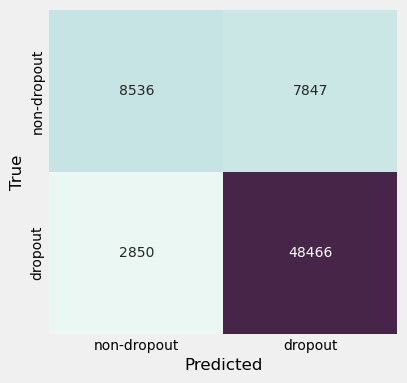

In [152]:
cm = confusion_matrix(test_y['truth'], y_pred)
plt.figure(figsize=(4,4))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap=sns.cubehelix_palette(start=.7, rot=-.5, light=0.95, dark=0.2, as_cmap=True), cbar=False)
ax.set_xlabel('Predicted'); ax.set_ylabel('True');
ax.xaxis.set_ticklabels(['non-dropout', 'dropout']); ax.yaxis.set_ticklabels(['non-dropout', 'dropout']);